In [ ]:
# standard
import pandas as pd
import numpy as np
import random
import os

# plots and images
import seaborn as sns
import matplotlib.pyplot as plt
from IPython.display import Image

# others
import re
import warnings
warnings.filterwarnings("ignore")


random.seed(2)
%matplotlib inline

In [ ]:
def preprocessor(text):
    text = re.sub('<[^>]*>', '', text)
    emoticons = re.findall('(?::|;|=)(?:-)?(?:\)|\(|D|P)',
                           text)
    text = (re.sub('[\W]+', ' ', text.lower()) +
            ' '.join(emoticons).replace('-', ''))
    return text

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
df_init = pd.read_csv('/content/drive/My Drive/Colab Notebooks/w266project/train_250k.csv')
print('Number of reviews:', df_init.shape[0])
#print('Unique rating values:', np.sort(df_init.rating.unique()))
df_init.head()
#df_init.to_csv('../data/train_250k.csv')

Number of reviews: 250000


,Unnamed: 0,id,target,comment_text,severe_toxicity,obscene,identity_attack,insult,threat,asian,...,article_id,rating,funny,wow,sad,likes,disagree,sexual_explicit,identity_annotator_count,toxicity_annotator_count
0,0,59848,0.000000,"This is so cool. It's like, 'would you want yo...",0.000000,0.0,0.000000,0.00000,0.0,NaN,...,2006,rejected,0,0,0,0,0,0.0,0,4
1,1,59849,0.000000,Thank you!! This would make my life a lot less...,0.000000,0.0,0.000000,0.00000,0.0,NaN,...,2006,rejected,0,0,0,0,0,0.0,0,4
2,2,59852,0.000000,This is such an urgent design problem; kudos t...,0.000000,0.0,0.000000,0.00000,0.0,NaN,...,2006,rejected,0,0,0,0,0,0.0,0,4
3,3,59855,0.000000,Is this something I'll be able to install on m...,0.000000,0.0,0.000000,0.00000,0.0,NaN,...,2006,rejected,0,0,0,0,0,0.0,0,4
4,4,59856,0.893617,haha you guys are a bunch of losers.,0.021277,0.0,0.021277,0.87234,0.0,0.0,...,2006,rejected,0,0,0,1,0,0.0,4,47


In [ ]:
df_init['comment_text'] = df_init['comment_text'].apply(preprocessor)

In [ ]:
# find zero-length reviews
zero_len_reviews = df_init[df_init['comment_text'].str.len().eq(1)]
print("Zero-length reviews: {}".format(zero_len_reviews.shape[0]))
display(zero_len_reviews)

Zero-length reviews: 29


,Unnamed: 0,id,target,comment_text,severe_toxicity,obscene,identity_attack,insult,threat,asian,...,article_id,rating,funny,wow,sad,likes,disagree,sexual_explicit,identity_annotator_count,toxicity_annotator_count
8813,8813,253136,0.0,k,0.0,0.0,0.0,0.0,0.0,NaN,...,50025,approved,0,0,0,0,0,0.0,0,10
10598,10598,255298,0.0,,0.0,0.0,0.0,0.0,0.0,NaN,...,97854,approved,0,0,0,0,0,0.0,0,10
23946,23946,271308,0.0,a,0.0,0.0,0.0,0.0,0.0,NaN,...,98501,approved,0,0,0,0,0,0.0,0,4
58305,58305,313335,0.1,,0.0,0.0,0.1,0.1,0.0,NaN,...,75668,approved,0,0,0,1,0,0.0,0,10
59512,59512,314835,0.1,,0.0,0.0,0.0,0.0,0.0,NaN,...,97560,approved,0,0,0,3,0,0.1,0,10
70442,70442,328514,0.0,,0.0,0.0,0.0,0.0,0.0,NaN,...,137511,approved,0,0,0,0,0,0.0,0,4
70468,70468,328543,0.0,k,0.0,0.0,0.0,0.0,0.0,NaN,...,137482,approved,0,0,0,0,0,0.0,0,4
70469,70469,328544,0.0,k,0.0,0.0,0.0,0.0,0.0,NaN,...,137482,approved,0,0,0,0,0,0.0,0,6
78744,78744,338945,0.0,,0.0,0.0,0.0,0.0,0.0,NaN,...,138070,approved,0,0,0,1,0,0.0,0,10
103598,103598,368918,0.0,,0.0,0.0,0.0,0.0,0.0,0.0,...,140311,approved,0,0,0,2,0,0.0,4,10


In [ ]:
# find extremely long text reviews
print('Distribution of review length:')
display(df_init.comment_text.str.len().describe())

# print number of reviews with more than 1000 tokens
print('\nReviews with more than 1000 tokens:', df_init[df_init.comment_text.str.len().gt(1000)].shape[0])

Distribution of review length:


count    250000.000000
mean        300.481880
std         271.415116
min           0.000000
25%          93.000000
50%         203.000000
75%         426.000000
max        1865.000000
Name: comment_text, dtype: float64


Reviews with more than 1000 tokens: 7


In [ ]:
# remove zero length and extremely long reviews
df_init = df_init[df_init['comment_text'].str.len().gt(1) & df_init['comment_text'].str.len().le(1000)]
# print('Number of reviews:', df_init.shape[0])

Text(0.5, 0, 'Number of tokens per review')

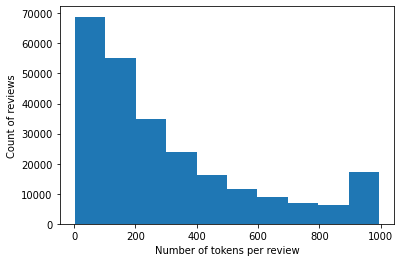

In [ ]:
plt.hist(df_init.comment_text.str.len());
plt.ylabel('Count of reviews')
plt.xlabel('Number of tokens per review')

In [ ]:
# create toxic column
df_init['toxic'] = np.where(df_init.target >= 0.5, 1, 0)
df = df_init[['comment_text', 'toxic']]
df.head()

,comment_text,toxic
0,this is so cool it s like would you want your ...,0
1,thank you this would make my life a lot less a...,0
2,this is such an urgent design problem kudos to...,0
3,is this something i ll be able to install on m...,0
4,haha you guys are a bunch of losers,1


In [ ]:
df_init.toxic.value_counts()

0    230456
1     19507
Name: toxic, dtype: int64

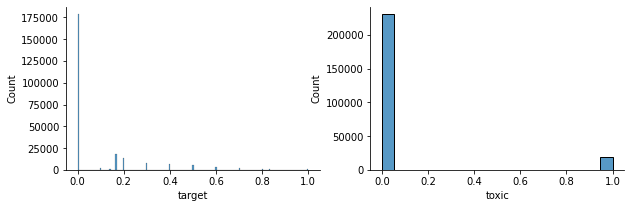

In [ ]:
# rating and sentiment histogram after preprocessing
cols = ['target', 'toxic']
nrows, ncols = 1, 2

f, axs = plt.subplots(1, 2, figsize=(10,3))
for idx, ax in enumerate(axs):
    sns.histplot(
    data=df_init,
    stat="count",
    x = cols[idx],
    ax=ax
    )

    # add labels and ticks
    ax.set(xlabel=cols[idx])
    #plt.xticks(np.arange(1,11,1))
    sns.despine()

In [ ]:
# randomly draw 19000 examples from each class
temp_positive = df[df.toxic.eq(1)].sample(
    n=19000,
    replace=False
)

temp_negative = df[df.toxic.eq(0)].sample(
    n=19000,
    replace=False
)

df_balanced = pd.concat(
    [temp_positive, temp_negative],
    axis=0)

# shuffle df_balanced
df_balanced.sample(frac=1) # frac=1 retains all the data
df_balanced.reset_index(drop=True, inplace=True) # reset index

print('After preprocessing, our data contains', df_balanced.shape[0], 'reviews.')

After preprocessing, our data contains 38000 reviews.


In [ ]:
# first, keep only review and sentiment from df_balanced
df_balanced = df_balanced[['comment_text', 'toxic']]
df_balanced.head(5)

,comment_text,toxic
0,people all over the country are so angry about...,1
1,barry soetoro has acted with stupidity and mal...,1
2,yeah hockeytown or is that you sarah palin moo...,1
3,with his words trump described acts of felonio...,1
4,walker is a one term gov he knows this he is t...,1


In [ ]:
df_balanced.to_csv("/content/drive/My Drive/Colab Notebooks/w266project/train.csv")